<a href="https://colab.research.google.com/github/kimik6/Deep-Clustering-Network/blob/master/Fetal_health_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---


#Fetal health Classification

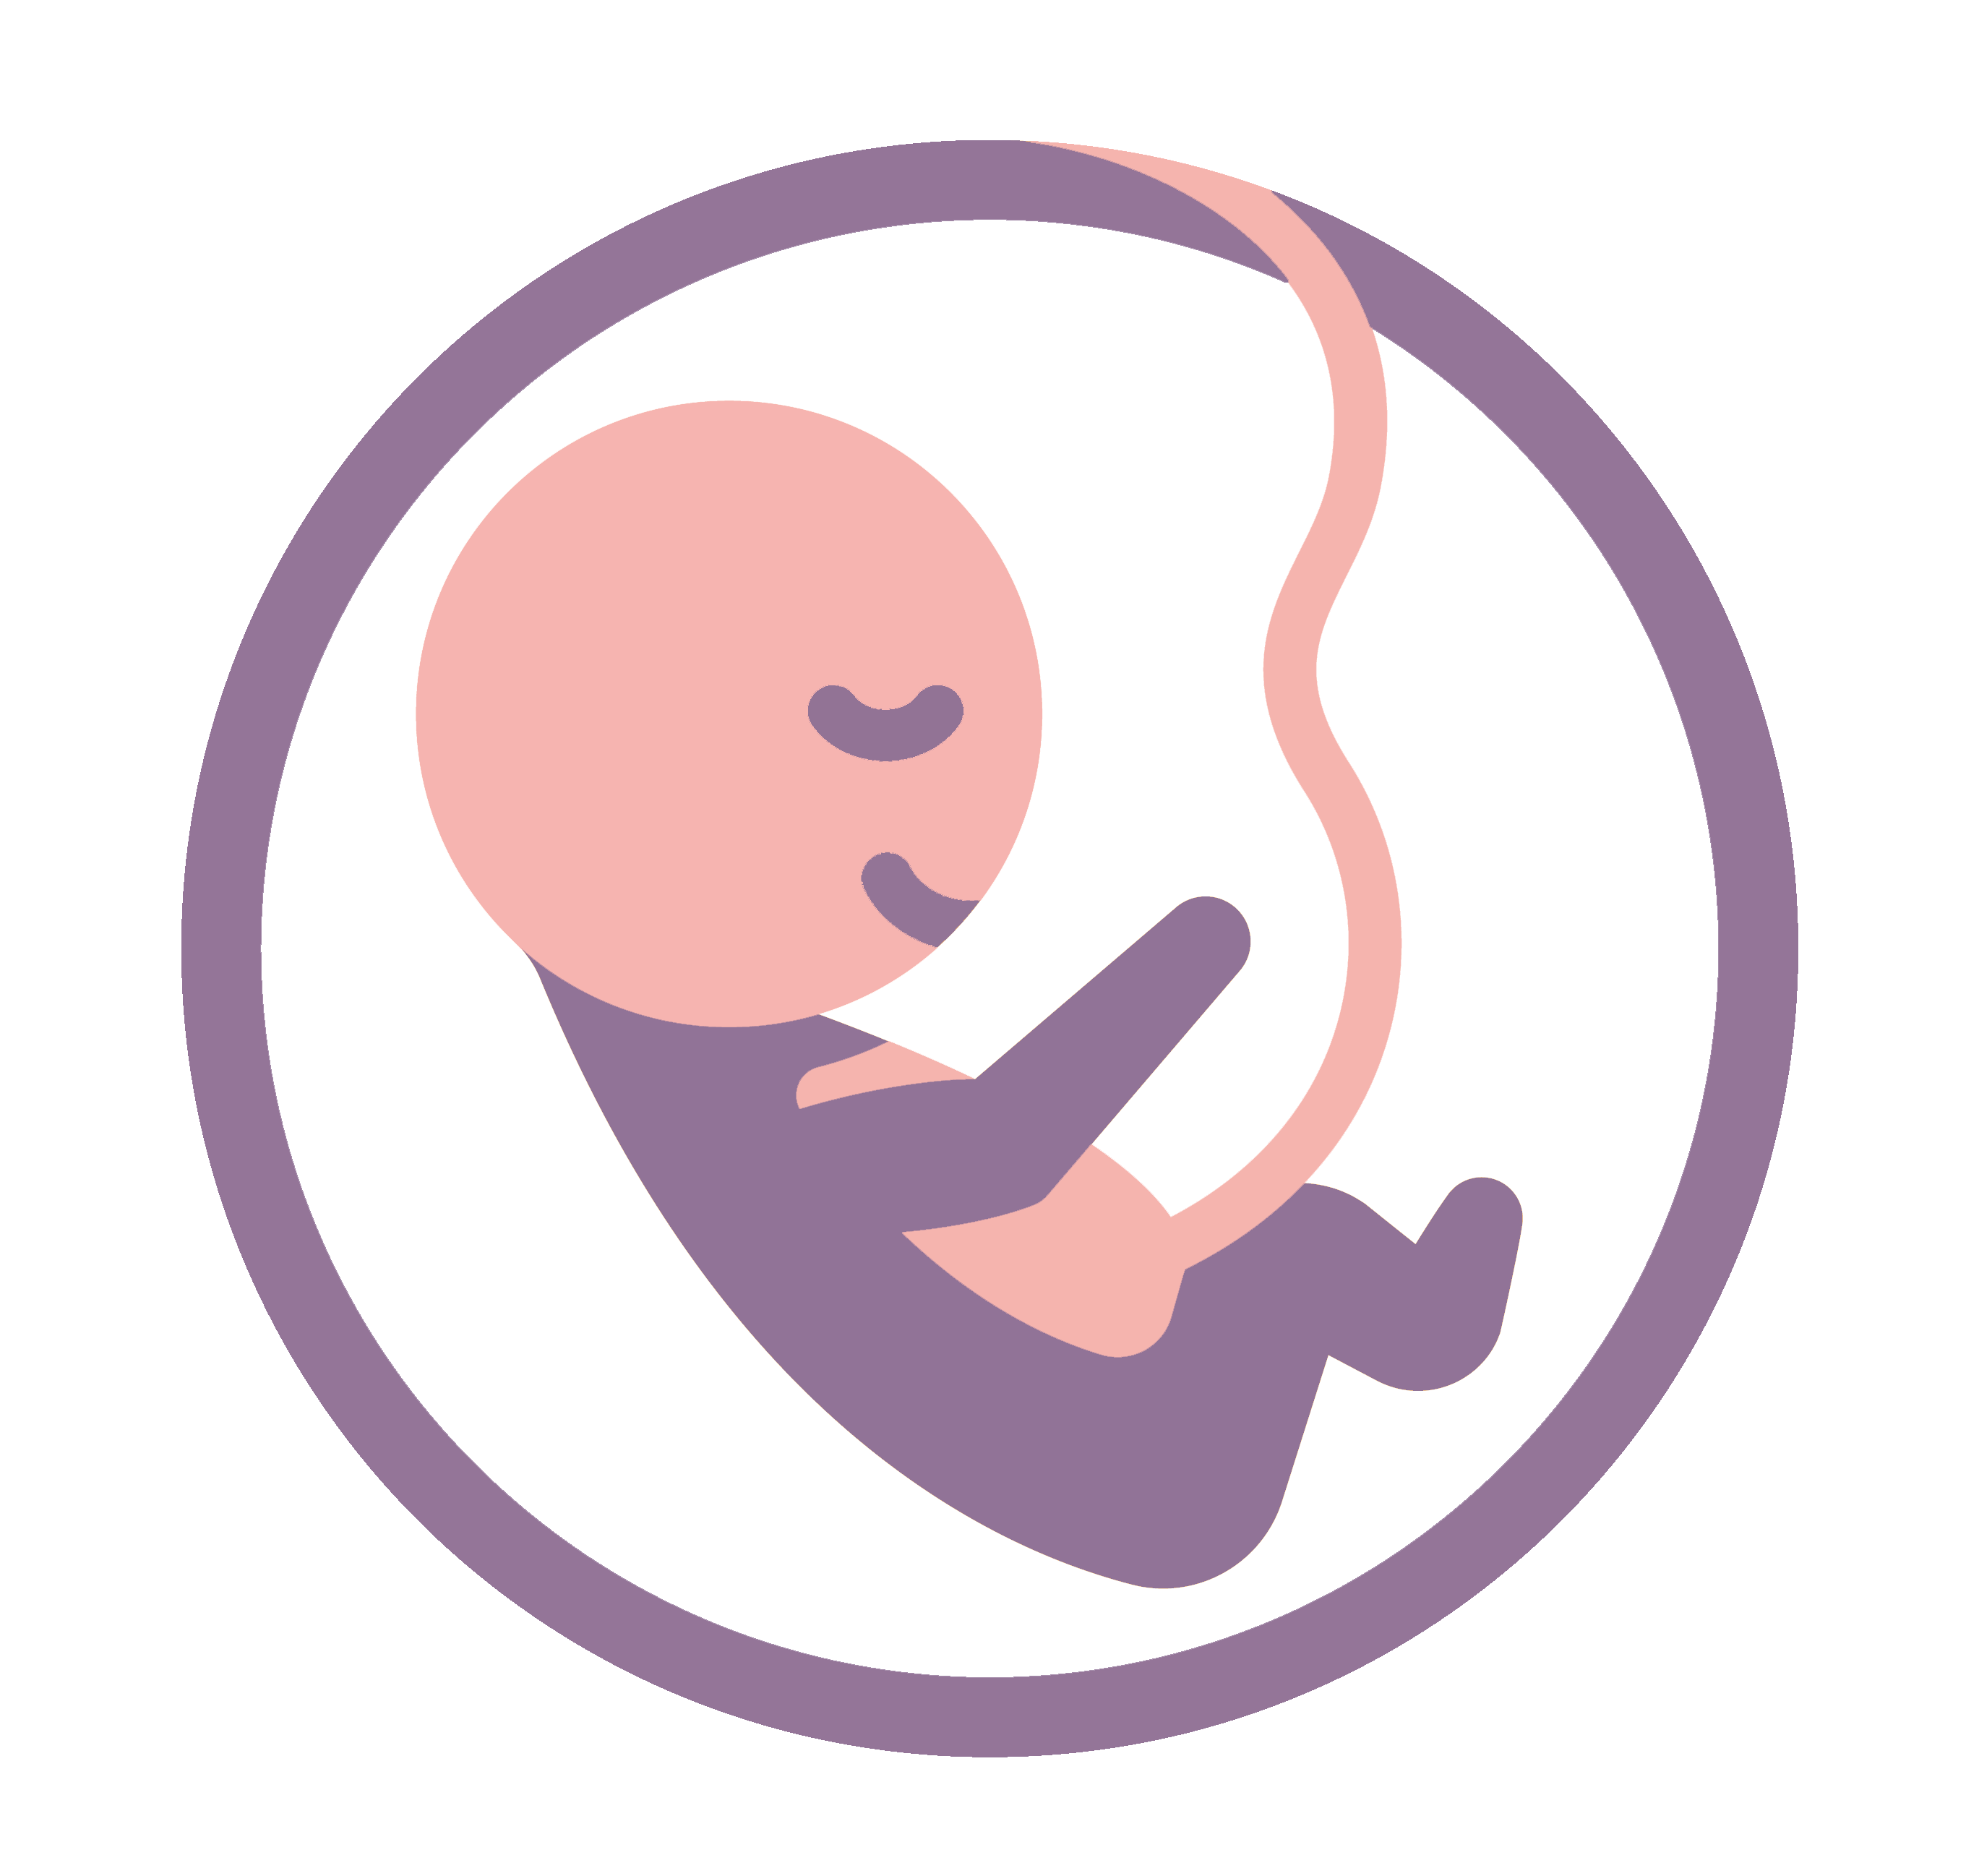

first of all. I import all the libraries we need here.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score,roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve,RocCurveDisplay,auc

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE

first of all I read the dataset and show some data descriptions


In [ ]:
df=pd.read_csv('fetal_health.csv')
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [ ]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [ ]:
print('Number of missing values in every feature:')
df.isnull().sum()

Number of missing values in every feature:


baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

so the data has no NAN at all.so we don't need to handle it.

# **Data VISUALIZATIONS**

Text(0.5, 1.0, 'Number of samples of each class')

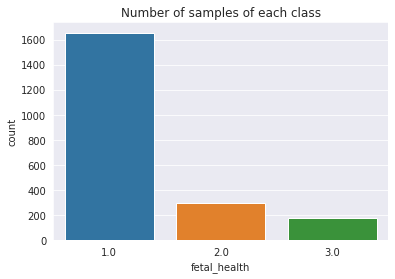

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')
sns.countplot(data=df,x='fetal_health')
plt.title("Number of samples of each class")

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


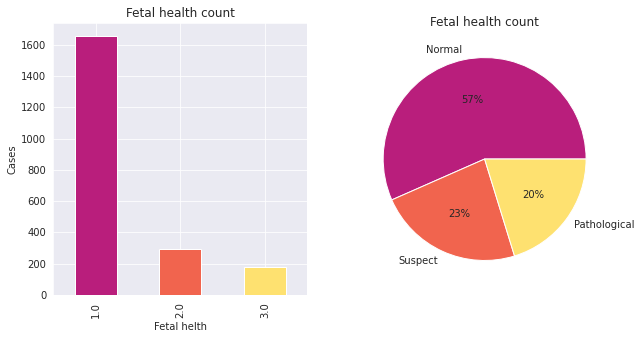

In [ ]:
total = df["fetal_health"].sum()
normal = total - 471
suspect = total - 1831
pathological = total - 1950

print(df["fetal_health"].value_counts())

plt.figure(figsize = (14,8))
plt.subplot(121)
# sns.countplot(x="fetal_health", data=data)
vis_fetal_health = df.fetal_health.value_counts().plot(figsize=(10, 5), kind="bar", color = ["#B91E7C", "#F1644E", "#FEE170"])
plt.title("Fetal health count")
plt.xlabel("Fetal helth")
plt.ylabel("Cases")


plt.subplot(122)
# plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], autopct="%1.0f%%")
plt.title("Fetal state")

vis_pie_fetal_health = plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], colors = ["#B91E7C", "#F1644E", "#FEE170"], autopct="%1.0f%%")
plt.title("Fetal health count")


plt.show()

as we can see the #1 class is more dominant which was expected becouse we expect most fetals would be in normal health.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(df.loc[:, df.columns != 'fetal_health'])
df_normalized = pd.DataFrame(normalized_data, columns=(df.loc[:, df.columns != 'fetal_health']).columns)

df_normalized.insert(21,'fetal_health',df['fetal_health'],True)




---



---

first of all I removed the outliers mostly to see the defrance between the original data and outlier removed one in training models. stay tuned !

In [ ]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.1)
    Q3=df.quantile(0.9)
    IQR=Q3-Q1
    df_final=df[~(((df>(Q3+1.5*IQR)) | (df>(Q3+1.5*IQR))))]
    return df_final.dropna().reset_index()
df_outlier_removed=remove_outlier_IQR(df)
del df_outlier_removed['index']


In [ ]:
df_normalized_outlier_removed=remove_outlier_IQR(df_normalized)
del df_normalized_outlier_removed['index']
df_normalized_outlier_removed

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,0.259259,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.813333,0.044118,0.472527,...,0.110092,0.034483,0.111111,0.0,0.472441,0.587156,0.403670,0.271375,1.0,2.0
1,0.481481,0.315789,0.000000,0.400000,0.2,0.0,0.0,0.066667,0.279412,0.000000,...,0.165138,0.655172,0.333333,0.1,0.637795,0.577982,0.577982,0.044610,0.5,1.0
2,0.500000,0.157895,0.000000,0.533333,0.2,0.0,0.0,0.053333,0.279412,0.000000,...,0.165138,0.655172,0.277778,0.1,0.637795,0.568807,0.559633,0.048327,0.5,1.0
3,0.518519,0.157895,0.000000,0.533333,0.2,0.0,0.0,0.053333,0.323529,0.000000,...,0.027523,0.413793,0.611111,0.0,0.606299,0.559633,0.550459,0.048327,1.0,1.0
4,0.481481,0.368421,0.000000,0.533333,0.0,0.0,0.0,0.053333,0.323529,0.000000,...,0.027523,0.413793,0.500000,0.0,0.606299,0.577982,0.559633,0.040892,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,0.629630,0.000000,0.000000,0.466667,0.0,0.0,0.0,0.893333,0.000000,0.274725,...,0.798165,0.474138,0.222222,0.0,0.732283,0.706422,0.688073,0.007435,0.5,2.0
1833,0.629630,0.052632,0.000000,0.466667,0.0,0.0,0.0,0.880000,0.029412,0.241758,...,0.486239,0.405172,0.333333,0.0,0.724409,0.688073,0.678899,0.011152,1.0,2.0
1834,0.629630,0.052632,0.000000,0.466667,0.0,0.0,0.0,0.893333,0.029412,0.219780,...,0.486239,0.413793,0.277778,0.0,0.732283,0.688073,0.688073,0.014870,1.0,2.0
1835,0.629630,0.052632,0.000000,0.400000,0.0,0.0,0.0,0.880000,0.029412,0.296703,...,0.486239,0.405172,0.333333,0.0,0.724409,0.678899,0.678899,0.014870,1.0,2.0


<Figure size 1080x1080 with 0 Axes>

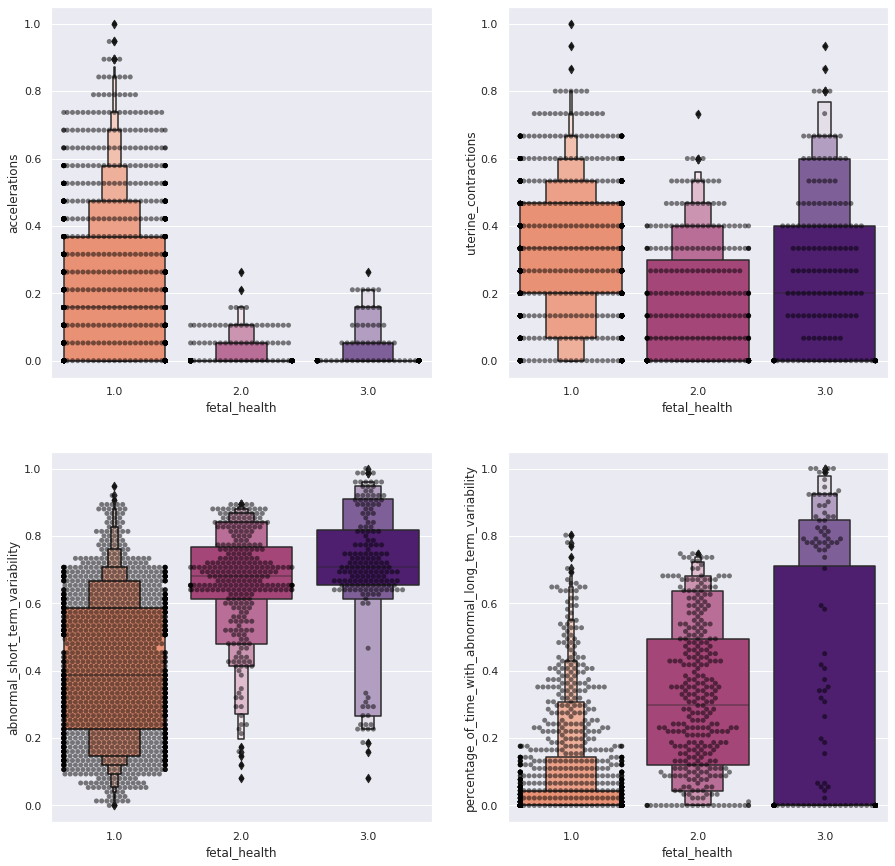

In [ ]:
cols=['accelerations', 'uterine_contractions', 'abnormal_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability']
plt.rc('figure', figsize=(15,15))
fig=plt.figure()
fig, axes = plt.subplots(ncols=2, nrows=2)
for i, ax in zip(cols, axes.flat) :
    sns.swarmplot(x=df_normalized["fetal_health"], y=df_normalized[i], color="black", alpha=0.5, ax=ax )
    sns.boxenplot(x=df_normalized["fetal_health"], y=df_normalized[i], palette='magma_r',ax=ax)
plt.show()

<Figure size 1080x1080 with 0 Axes>

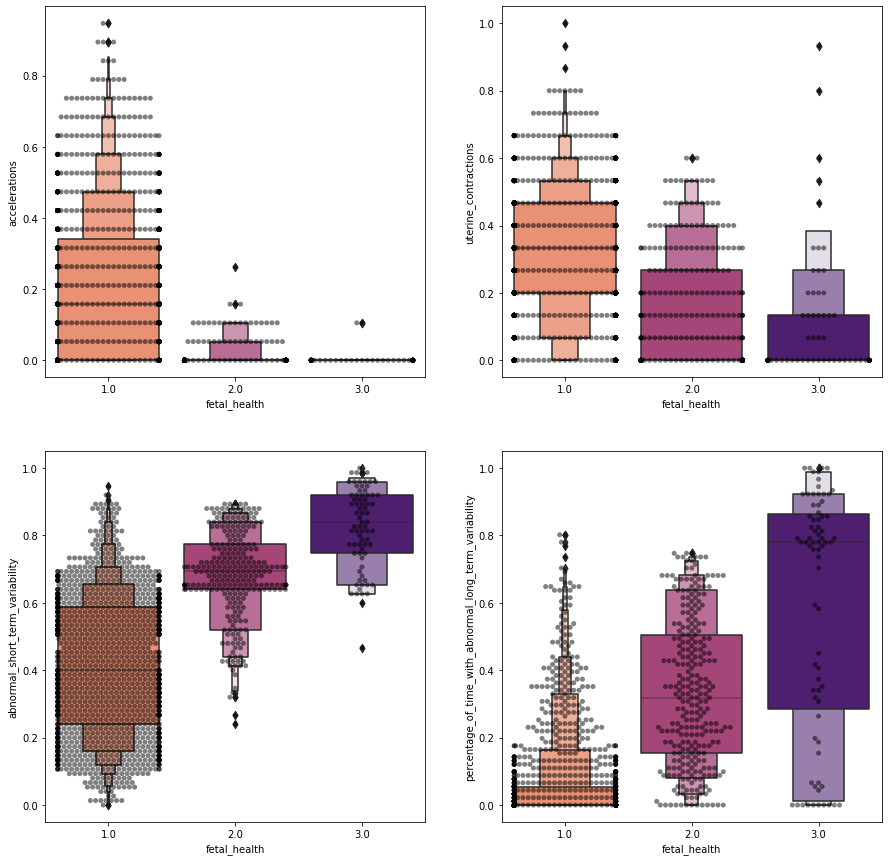

In [ ]:
cols=['accelerations', 'uterine_contractions', 'abnormal_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability']
plt.rc('figure', figsize=(15,15))
fig=plt.figure()
fig, axes = plt.subplots(ncols=2, nrows=2)
for i, ax in zip(cols, axes.flat) :
    sns.swarmplot(x=df_normalized_outlier_removed["fetal_health"], y=df_normalized_outlier_removed[i], color="black", alpha=0.5, ax=ax )
    sns.boxenplot(x=df_normalized_outlier_removed["fetal_health"], y=df_normalized_outlier_removed[i], palette='magma_r', ax=ax)
plt.show()

<Figure size 1080x3600 with 0 Axes>

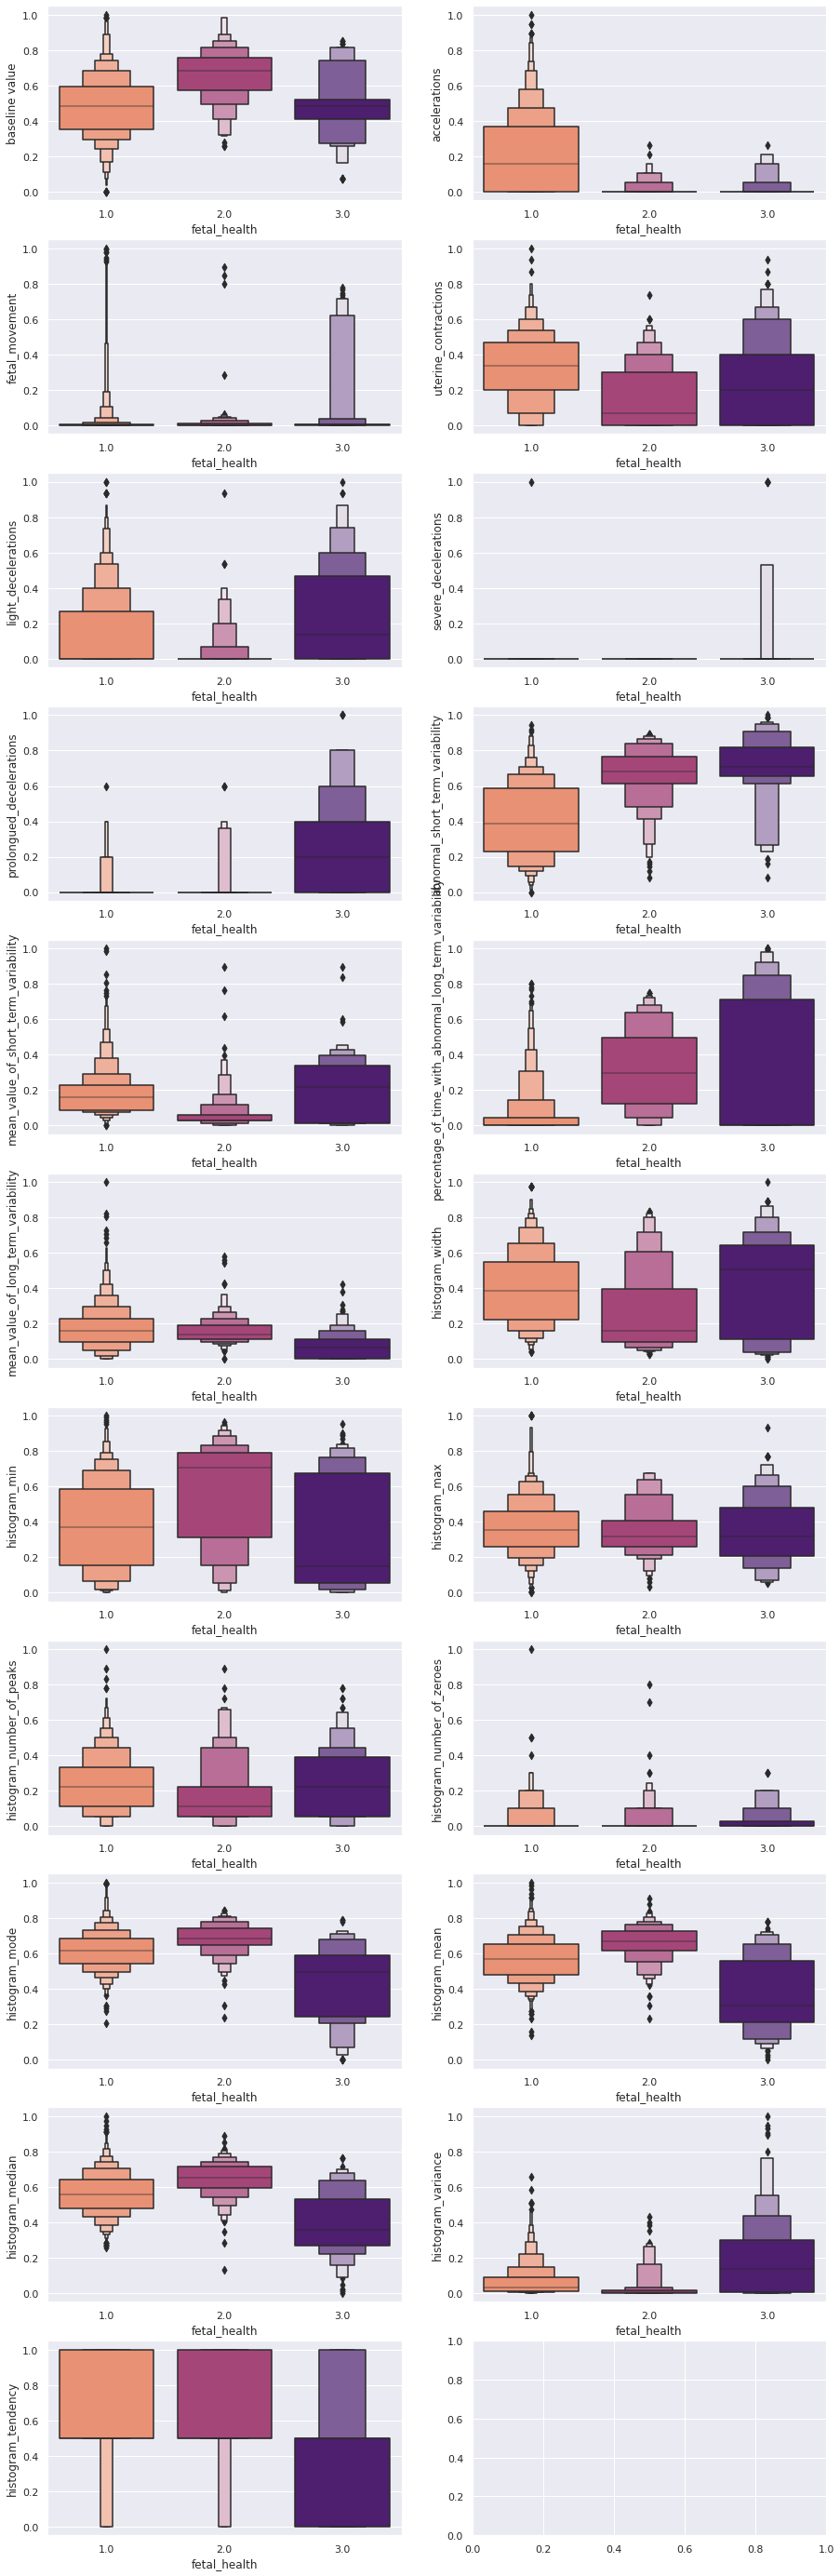

In [ ]:
cols=(df.loc[:, df.columns != 'fetal_health']).columns
plt.rc('figure', figsize=(15,50))
fig=plt.figure()
fig, axes = plt.subplots(ncols=2, nrows=11)
for i, ax in zip(cols, axes.flat) :
    sns.boxenplot(x=df_normalized["fetal_health"], y=df_normalized[i],data=df_normalized ,palette='magma_r', ax=ax)
plt.show()

<Figure size 1080x3600 with 0 Axes>

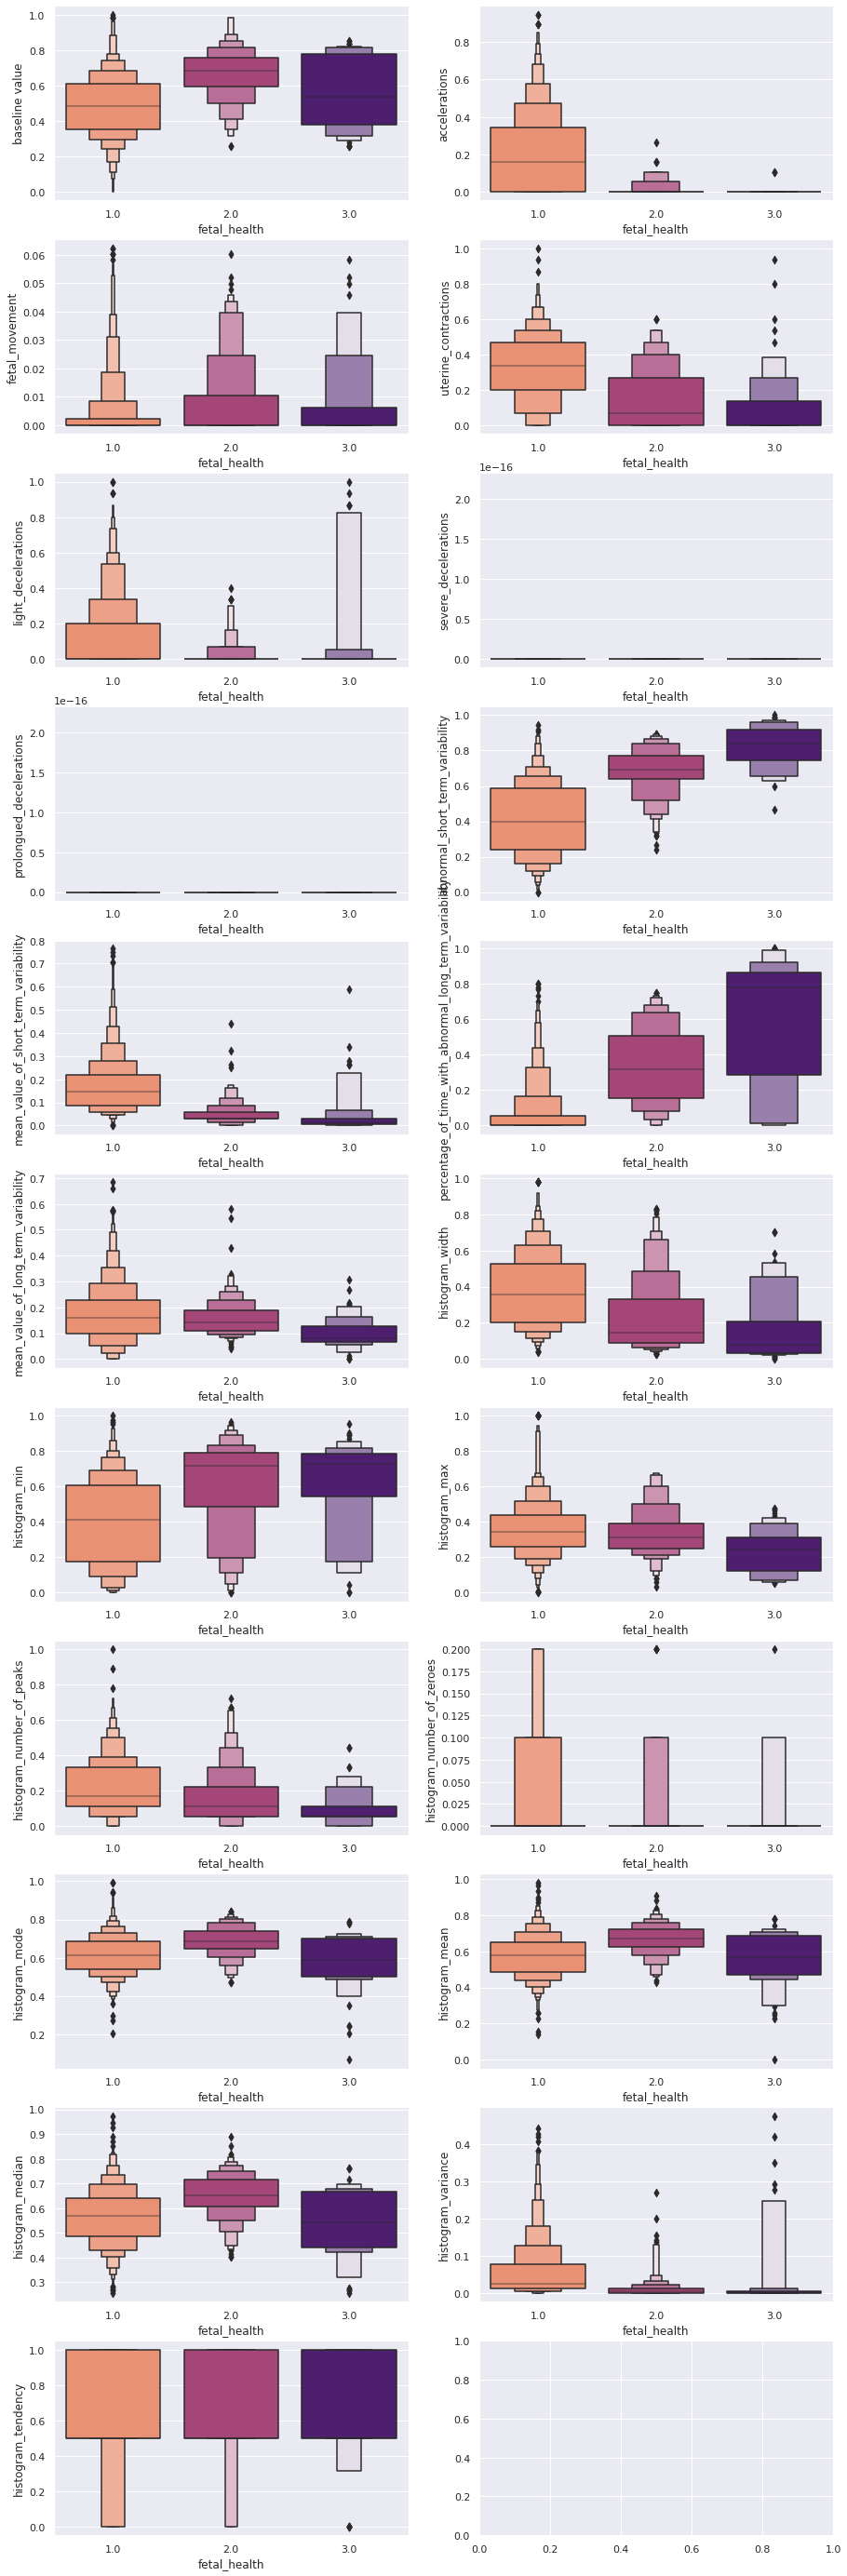

In [ ]:
cols=(df.loc[:, df.columns != 'fetal_health']).columns
plt.rc('figure', figsize=(15,50))
fig=plt.figure()
fig, axes = plt.subplots(ncols=2, nrows=11)
for i, ax in zip(cols, axes.flat) :
    sns.boxenplot(x=df_normalized_outlier_removed["fetal_health"], y=df_normalized_outlier_removed[i],data=df_normalized_outlier_removed ,palette='magma_r', ax=ax)

plt.show()

In [ ]:
corr=df_normalized.corr()
corr['fetal_health'].sort_values(ascending= False)

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
histogram_number_of_zeroes                               -0.016682
histogram_number_of_peaks                                -0.023666
histogram_max                                            -0.045265
histogram_width                                          -0.068789
mean_value_of_short_term_variability                     -0.10

In [ ]:
corr=df_normalized_outlier_removed.corr()
corr['fetal_health'].sort_values(ascending= False)

fetal_health                                              1.000000
percentage_of_time_with_abnormal_long_term_variability    0.649082
abnormal_short_term_variability                           0.525078
histogram_min                                             0.295360
baseline value                                            0.280458
histogram_mean                                            0.163276
fetal_movement                                            0.150181
histogram_median                                          0.144777
histogram_mode                                            0.120607
histogram_tendency                                        0.033884
histogram_number_of_zeroes                               -0.119642
mean_value_of_long_term_variability                      -0.135976
light_decelerations                                      -0.139110
histogram_max                                            -0.156169
histogram_variance                                       -0.18

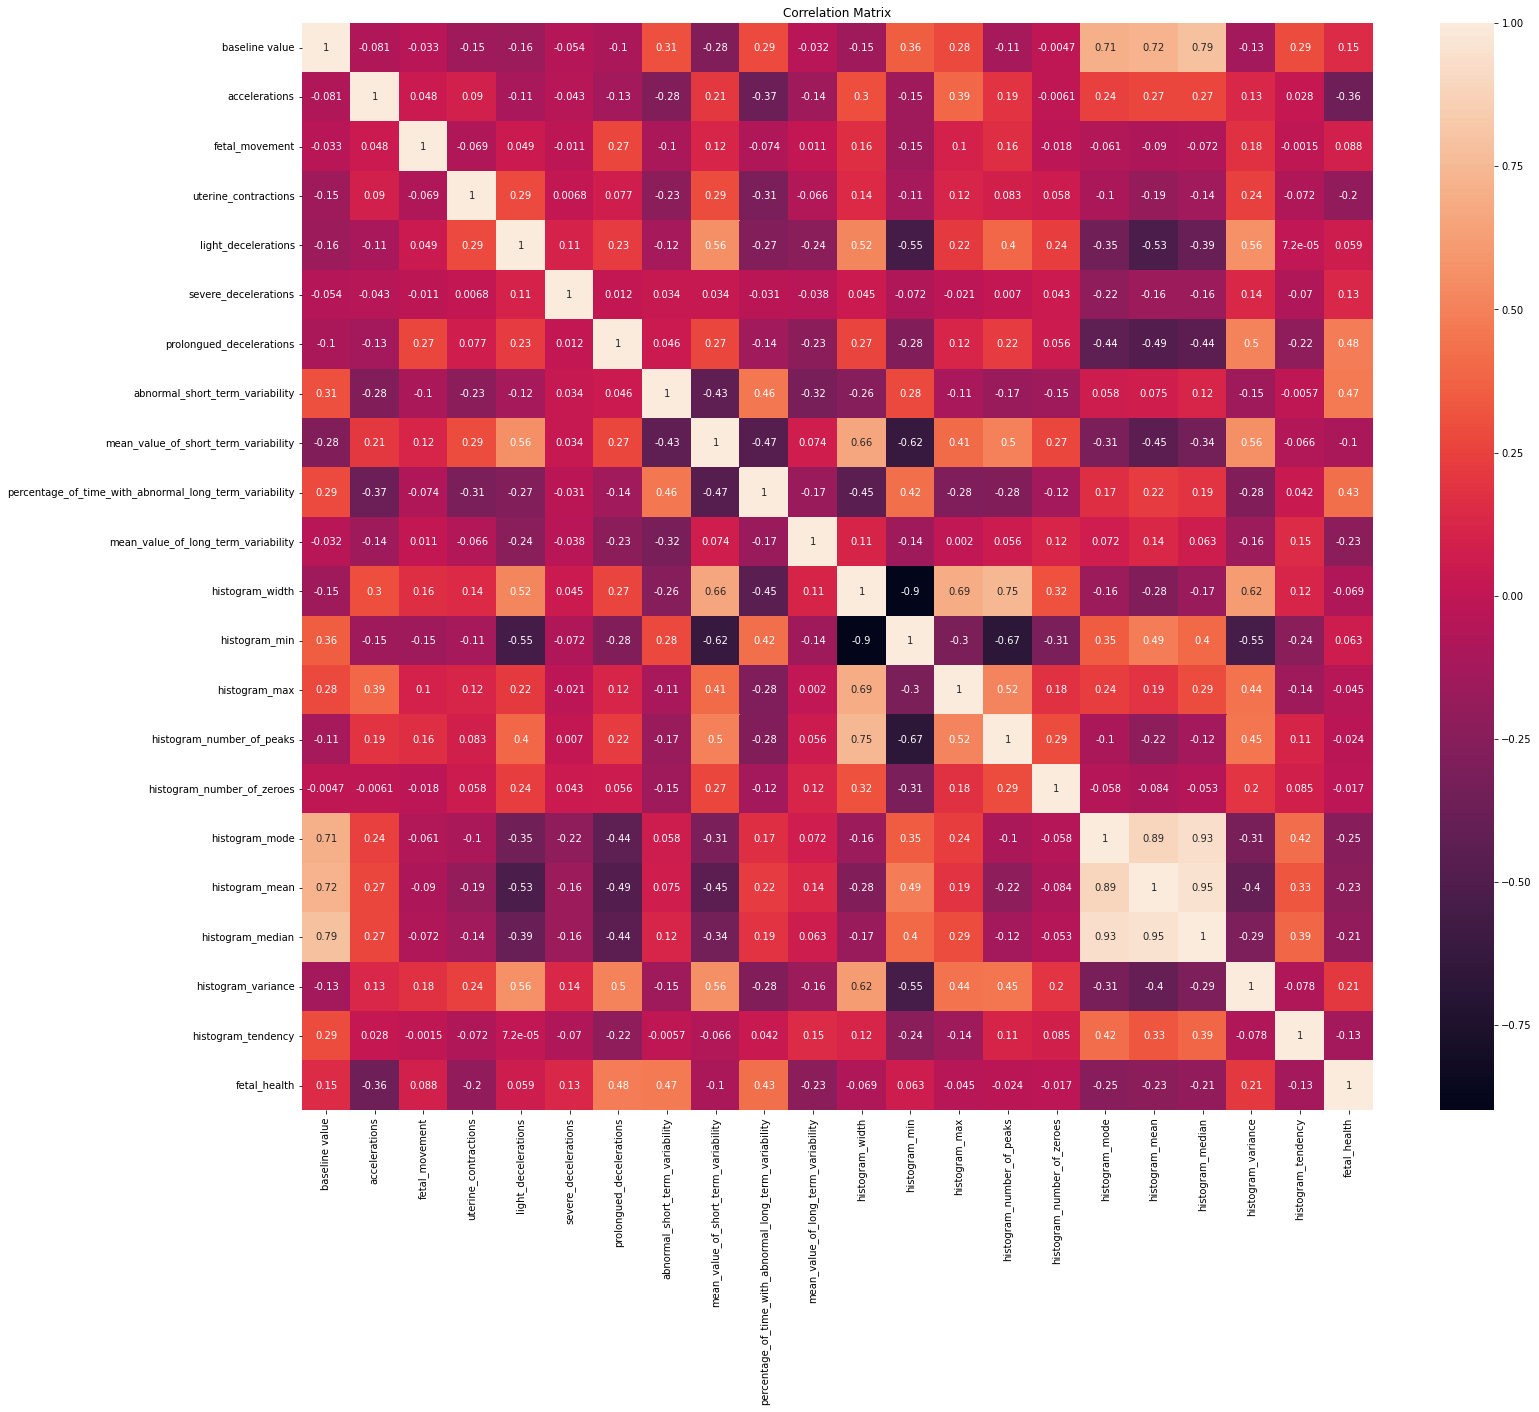

In [ ]:
corr = df.corr()

plt.figure(figsize=(24, 20))
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix")
plt.show()



---



---



# Define evaluating functions

In [ ]:
def plot_roc_curve(y_test,y_score):

    fpr, tpr, threshold = roc_curve(y_test, y_score,pos_label=2)
    #fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc=auc(fpr,tpr)
    print(roc_auc)
    # Plot of a ROC curve for a specific class
    plt.figure()
    plt.plot(fpr, tpr,lw=10, label='ROC curve (area = %0.2f)' % roc_auc,color="#F1644E")
    plt.plot([0, 1], [0, 1], 'k--',color='#B91E7C')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
def plotConfusionMatrix(y_pred, y_test):
  ax= plt.subplot()

  sns.heatmap(confusion_matrix(y_test, y_pred), cmap="magma_r",  ax = ax, annot=True)
  ax.set_xlabel("Predicted labels");
  ax.set_ylabel("True labels");
  ax.set_title("Confusion Matrix");
  ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);
  ax.yaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

  plt.rc('figure', figsize=(10,5))
  plt.show()

In [ ]:
def resultsSummarizer(y_pred,y_true,kfold_acc=0):
    from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score,confusion_matrix, mean_absolute_error , r2_score , mean_squared_error, mean_absolute_percentage_error
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    sensitivity = recall_score(y_true,y_pred,average='macro')

    if (kfold_acc != 0):
      print(f'Accuracy Score 5-fold method: ' + '{:.4%}'.format(kfold_acc))

    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))
    print(f'Sensitvity: ' + '{:.4%}'.format(sensitivity))
    plotConfusionMatrix(y_pred,y_true)
    plot_roc_curve(y_true,y_pred)
    return accuracy_score(y_true, y_pred)

# **K-Nearest Neighbors**

Knn method using k-fold

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
y = df['fetal_health']
X=df_normalized.drop(['fetal_health'], axis=1)

y2 = df_normalized_outlier_removed['fetal_health']
X2=df_normalized_outlier_removed.drop(['fetal_health'], axis=1)

In [ ]:
sm = SMOTE(random_state=42)
X_res2, y_res2 = sm.fit_resample(X2, y2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=1, stratify=y)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2 , test_size=0.3, random_state=1, stratify=y2)

X_train_res, X_test_res, y_train_res, y_test_res = split(X_res, y_res, test_size=0.2, shuffle=True, stratify=y_res, random_state= 1)


In [ ]:

pca=PCA(n_components=0.95) #0.95 here refers that the total variance explained by the components must be atleast 95%
X_pca=pca.fit_transform(X)
X_pca=pd.DataFrame(X_pca)
y_pca=y
X_pca.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.124537,-0.147696,-0.703329,0.094361,-0.357170,-0.232448,0.157297,-0.057918,0.028319,-0.157068,-0.007765
1,0.535457,0.003731,0.378646,-0.049223,-0.011393,0.208109,0.106487,-0.076414,-0.075349,-0.071608,-0.011540
2,0.525675,0.037819,0.319870,0.001700,0.127113,0.291790,0.049659,-0.174583,-0.081047,-0.124556,0.010017
3,0.643625,-0.383149,0.064835,0.249183,0.087987,0.252253,0.034191,-0.265309,-0.041840,0.148622,-0.032371
4,0.582850,-0.403692,0.222756,0.289410,-0.036096,0.077018,0.071676,-0.309663,0.028877,0.038948,-0.052585


In [ ]:
def knnClassifire(X,y,k=5,leafsize=30):

# Cross validate K-Nearest Neighbors model
  knn = KNeighborsClassifier(n_neighbors=k,leaf_size=leafsize)
  cv_method = StratifiedKFold(n_splits=5,
                            random_state=42,
                            shuffle=True
                            )

  scores_knn = cross_val_score(knn, X, y, cv = cv_method, n_jobs = 2, scoring = "accuracy")

  X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=1, stratify=y)

  knn_mod = knn.fit(X_train, y_train)

  y_pred_knn = knn_mod.predict(X_test)

  kfold_acc=scores_knn.mean()

  return y_pred_knn,y_test, kfold_acc



---



> **KNN classification for normalized data**




Accuracy Score 5-fold method: 91.0632%
Accuracy Score: 91.3793%
Precision Score: 89.5897%
Recall Score: 77.2233%
F_1 Score: 82.3434%
Sensitvity: 77.2233%


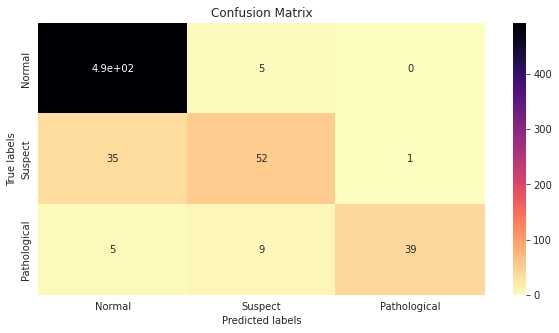

0.7321487603305786


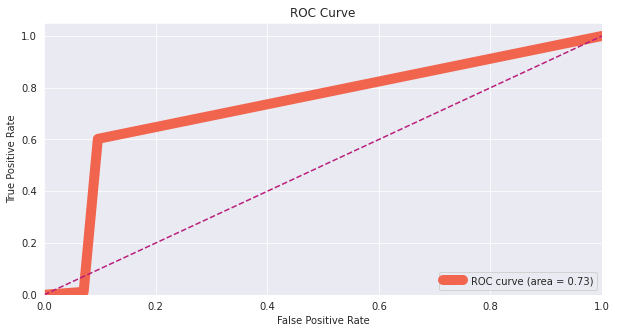

In [ ]:
y_pred_knn,y_test,kfold_acc=knnClassifire(X,y)
acc_knn1=resultsSummarizer(y_pred_knn,y_test,kfold_acc)



---



> **KNN classification for normalized- outlier removed data**




Accuracy Score 5-fold method: 90.2556%
Accuracy Score: 91.1232%
Precision Score: 84.4098%
Recall Score: 73.2427%
F_1 Score: 77.9162%
Sensitvity: 73.2427%


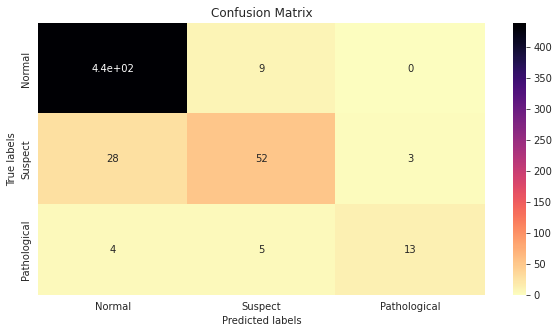

0.7943972050247899


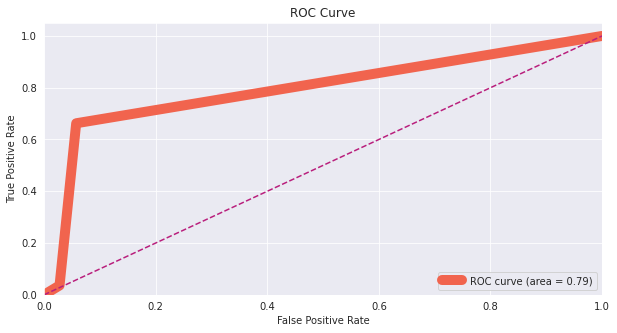

In [ ]:
y_pred_knn,y_test,kfold_acc=knnClassifire(X2,y2)
acc_knn2=resultsSummarizer(y_pred_knn,y_test,kfold_acc)



---



> **KNN classification using PCA for feature generation**




Accuracy Score 5-fold method: 91.1571%
Accuracy Score: 91.3793%
Precision Score: 88.5829%
Recall Score: 78.9704%
F_1 Score: 83.1361%
Sensitvity: 78.9704%


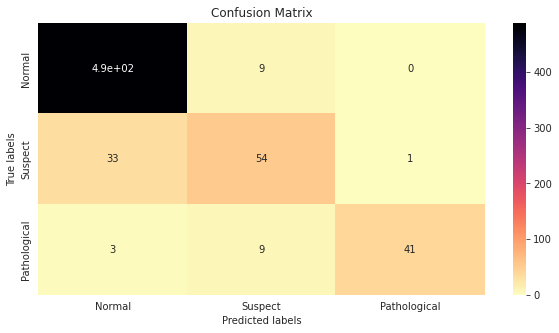

0.7361776859504132


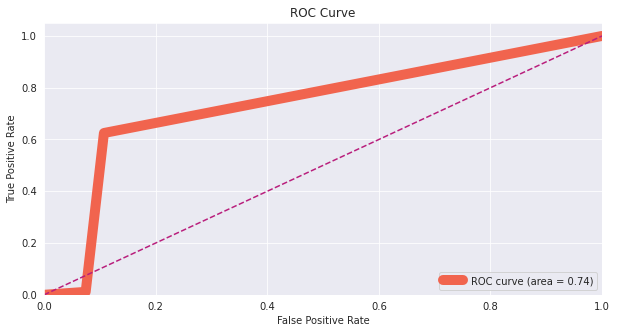

In [ ]:
pca=PCA(n_components=0.95) #0.95 here refers that the total variance explained by the components must be atleast 95%
X_pca=pca.fit_transform(X)
y_pca=y
y_pred_knn,y_test,kfold_acc=knnClassifire(X_pca,y_pca)
acc_knn_pca=resultsSummarizer(y_pred_knn,y_test,kfold_acc)


---



> **KNN classification using LDA for feature generation**



Accuracy Score 5-fold method: 90.0924%
Accuracy Score: 91.1232%
Precision Score: 89.0918%
Recall Score: 74.4184%
F_1 Score: 79.5214%
Sensitvity: 74.4184%


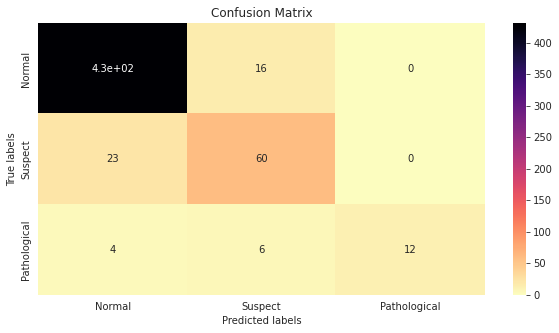

0.815950368638734


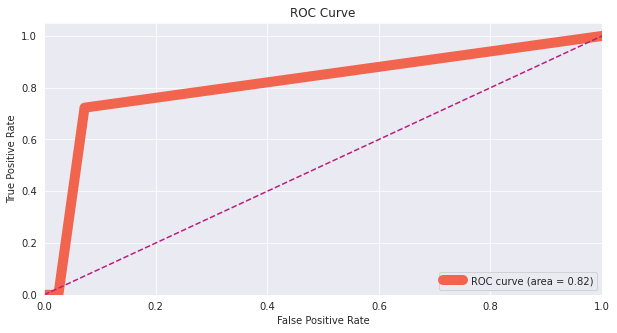

In [ ]:
X_lda = LDA(n_components=2).fit_transform(X2,y2)
y_lda=y2

y_pred_knn,y_test,kfold_acc=knnClassifire(X_lda,y_lda)
acc_knn_lda=resultsSummarizer(y_pred_knn,y_test,kfold_acc)


---



> **KNN classification  with Optimized K**



In [ ]:
params_knn = {"leaf_size": list(range(1,9)),
              "n_neighbors": list(range(1,9)),}

In [ ]:
cv_method = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)

In [ ]:
GridSearchCV_knn = GridSearchCV(estimator=KNeighborsClassifier(),
                                param_grid=params_knn,
                                cv=cv_method,
                                verbose=1,
                                n_jobs=-1,
                                scoring="accuracy",
                                )

In [ ]:
# Fit model with train data
GridSearchCV_knn.fit(X_pca, y_pca);

Fitting 5 folds for each of 64 candidates, totalling 320 fits


In [ ]:
best_estimator_knn = GridSearchCV_knn.best_estimator_
print(f"Best estimator for KNN model:\n{best_estimator_knn}")

Best estimator for KNN model:
KNeighborsClassifier(leaf_size=1, n_neighbors=3)


In [ ]:
best_score_knn = GridSearchCV_knn.best_score_
print(f"Best score for GNB model: {round(best_score_knn, 3)}")

Best score for GNB model: 0.914


Accuracy Score 5-fold method: 91.3923%
Accuracy Score: 91.8495%
Precision Score: 89.0162%
Recall Score: 79.7335%
F_1 Score: 83.7594%
Sensitvity: 79.7335%


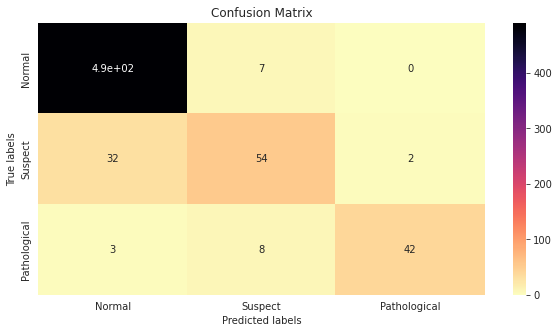

0.7432438016528925


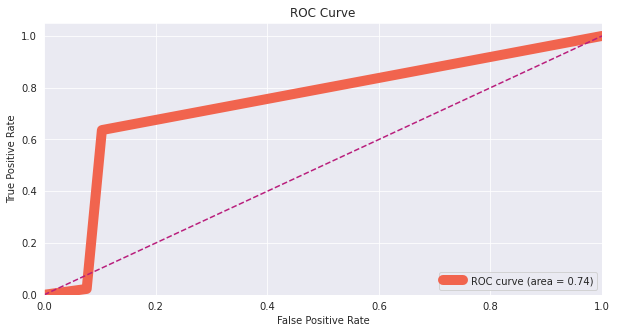

In [ ]:
y_pred_knn,y_test,kfold_acc=knnClassifire(X_pca,y_pca,3,1)
acc_knn_opt=resultsSummarizer(y_pred_knn,y_test,kfold_acc)

# **Logistic regression**

In [ ]:
#features
# X = df.iloc[:,:-1]
X = df_normalized.drop("fetal_health", axis=1)

#label
# y = df.iloc[:,-1]
y = df_normalized.loc[:, "fetal_health"]

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95) #0.95 here refers that the total variance explained by the components must be atleast 95%
X_pca=pca.fit_transform(X)
X_pca=pd.DataFrame(X_pca)
y_pca=y
X_pca.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.124537,-0.147696,-0.703329,0.094361,-0.357170,-0.232448,0.157297,-0.057918,0.028319,-0.157068,-0.007765
1,0.535457,0.003731,0.378646,-0.049223,-0.011393,0.208109,0.106487,-0.076414,-0.075349,-0.071608,-0.011540
2,0.525675,0.037819,0.319870,0.001700,0.127113,0.291790,0.049659,-0.174583,-0.081047,-0.124556,0.010017
3,0.643625,-0.383149,0.064835,0.249183,0.087987,0.252253,0.034191,-0.265309,-0.041840,0.148622,-0.032371
4,0.582850,-0.403692,0.222756,0.289410,-0.036096,0.077018,0.071676,-0.309663,0.028877,0.038948,-0.052585


In [ ]:
#loading all the sklearn modules I need

#data preparation:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as split

import warnings
warnings.filterwarnings("ignore")


#splitting
seed = 172 #defining seed
X_train, X_test, y_train, y_test = split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state= seed)
print(X_train.shape)
print(y_train.shape)

#normalizing features
scaler = StandardScaler() #calling the scaler
#fitting the features to scale them
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(1700, 21)
(1700,)


In [ ]:
def LogisticReg (X,y):
  seed = 172 #defining seed
  #logistic regression model
  from sklearn import model_selection
  from sklearn.linear_model import LogisticRegression # import model
  from sklearn.model_selection import StratifiedKFold #stratification by fetal health

  model_lr = LogisticRegression(max_iter=150, random_state=seed)
  #test train result for confusion matrix

  X_train, X_test, y_train, y_test = split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state= seed)
  model_lr2 = model_lr.fit(X_train, y_train)
  y_pred_log=model_lr2.predict(X_test)

#CROSS VAL results

  crossval = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

  results = model_selection.cross_val_score(model_lr, X, y, cv=crossval, scoring='accuracy')



  return y_pred_log, y_test,results.mean()

Accuracy Score 5-fold method: 89.3698%
Accuracy Score: 90.1408%
Precision Score: 83.8372%
Recall Score: 74.8743%
F_1 Score: 78.7227%
Sensitvity: 74.8743%


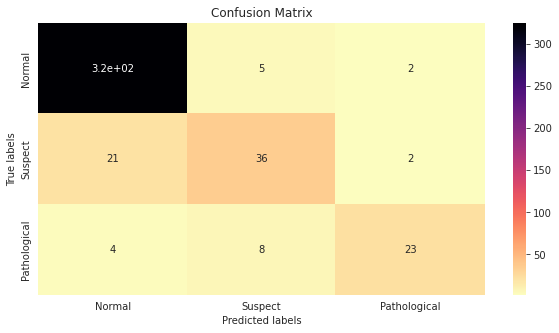

0.7500808202096708


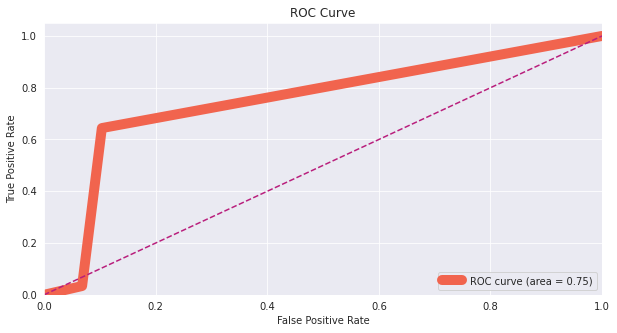

In [ ]:
y_pred_log, y_test,kfoldacc=LogisticReg(X,y)
acc_lr=resultsSummarizer(y_pred_log, y_test,kfoldacc)

Accuracy Score 5-fold method: 89.1679%
Accuracy Score: 90.7609%
Precision Score: 78.1099%
Recall Score: 67.8137%
F_1 Score: 71.7611%
Sensitvity: 67.8137%


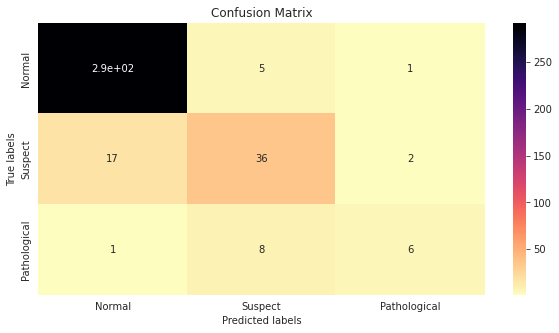

0.8069416206796399


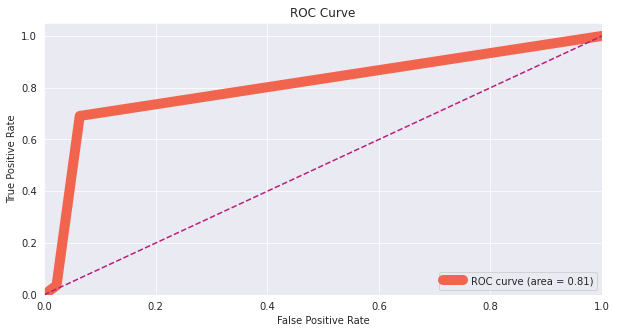

In [ ]:
y_pred_log, y_test,kfoldacc=LogisticReg(X2,y2)
acc_lr2=resultsSummarizer(y_pred_log, y_test,kfoldacc)

Accuracy Score 5-fold method: 88.8995%
Accuracy Score: 90.8451%
Precision Score: 85.9717%
Recall Score: 75.5629%
F_1 Score: 79.9262%
Sensitvity: 75.5629%


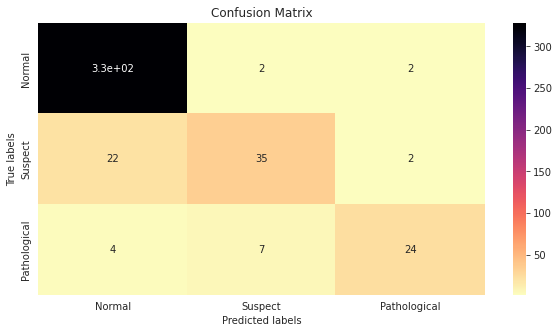

0.7452777906063826


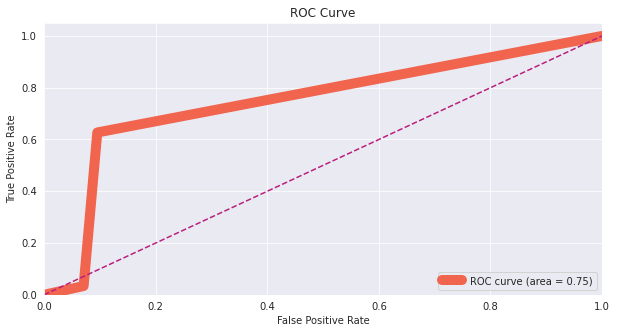

In [ ]:
y_pred_log, y_test,kfoldacc=LogisticReg(X_pca,y_pca)
acc_lr_pca=resultsSummarizer(y_pred_log, y_test,kfoldacc)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

X_lda = LDA(n_components=2).fit_transform(X2,y2)


Accuracy Score 5-fold method: 89.9840%
Accuracy Score: 90.4891%
Precision Score: 75.5291%
Recall Score: 71.9226%
F_1 Score: 73.5902%
Sensitvity: 71.9226%


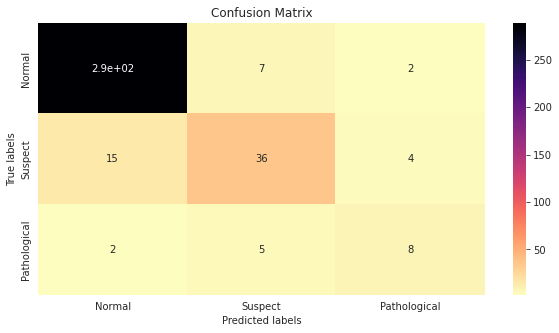

0.8194307290153936


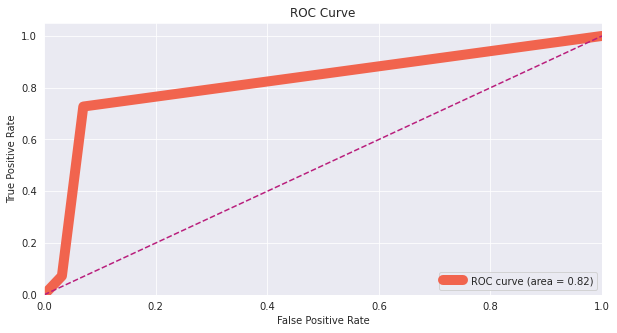

In [ ]:
y_pred_log, y_test,kfoldacc=LogisticReg(X_lda,y2)
acc_lr_lda=resultsSummarizer(y_pred_log, y_test,kfoldacc)

# **Support vector machine**

In [ ]:
def svmFunction(X,y):

  X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=1, stratify=y)
  svc=SVC()
  svc.fit(X_train,y_train)
  y_pred_SVM =svc.predict(X_test)
  acc=accuracy_score(y_test, y_pred_SVM)

  return y_pred_SVM, y_test,acc

Accuracy Score: 92.4883%
Precision Score: 92.6875%
Recall Score: 80.5256%
F_1 Score: 85.5184%
Sensitvity: 80.5256%


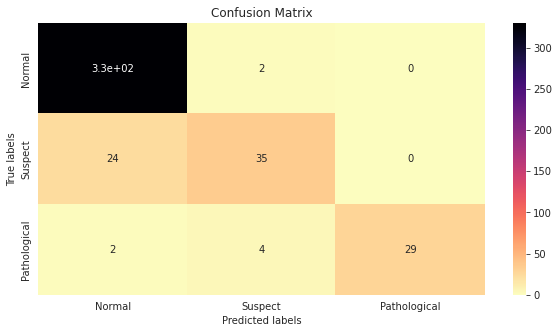

0.725488384981296


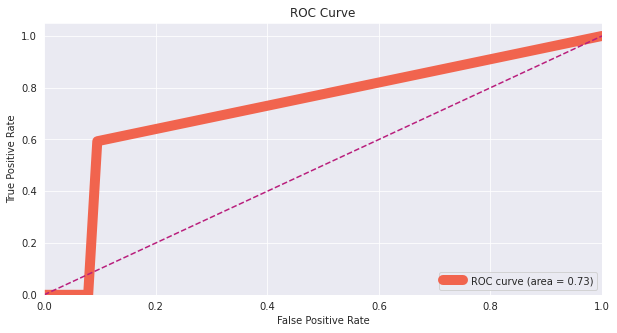

In [ ]:
y_pred_SVM, y_test,acc=svmFunction(X,y)
acc_svm1=resultsSummarizer(y_pred_SVM, y_test)

Accuracy Score: 90.4891%
Precision Score: 88.8135%
Recall Score: 67.7019%
F_1 Score: 73.8758%
Sensitvity: 67.7019%


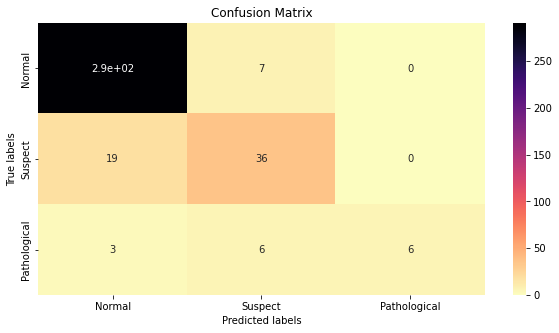

0.7906476909671798


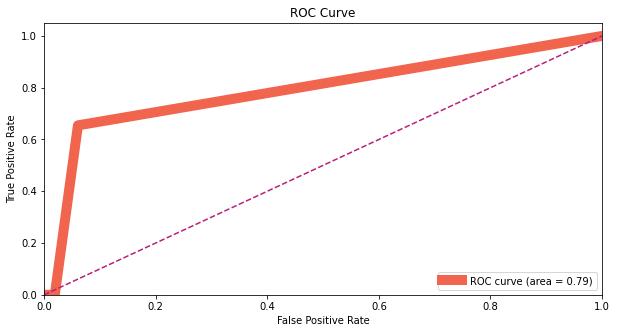

In [ ]:
y_pred_SVM, y_test,acc=svmFunction(X2,y2)
acc_svm2=resultsSummarizer(y_pred_SVM, y_test)

In [ ]:
X_pca = PCA(n_components=0.95).fit_transform(X)
y_pca=y

Accuracy Score: 93.4272%
Precision Score: 92.5287%
Recall Score: 84.1020%
F_1 Score: 87.8482%
Sensitvity: 84.1020%


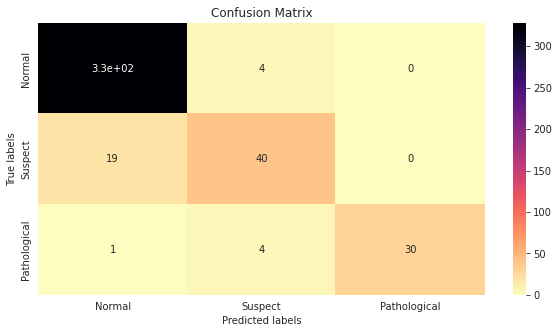

0.7595021475084284


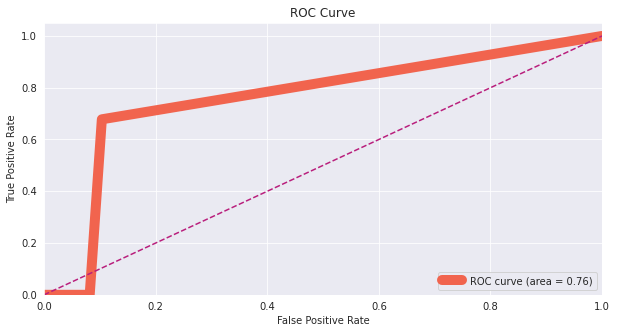

In [ ]:
y_pred_SVM, y_test,acc=svmFunction(X_pca,y_pca)
acc_svm_pca=resultsSummarizer(y_pred_SVM, y_test)

In [ ]:
X_lda = LDA(n_components=2).fit_transform(X,y)
y_lda=y

Accuracy Score: 92.0188%
Precision Score: 86.8079%
Recall Score: 82.3374%
F_1 Score: 84.3970%
Sensitvity: 82.3374%


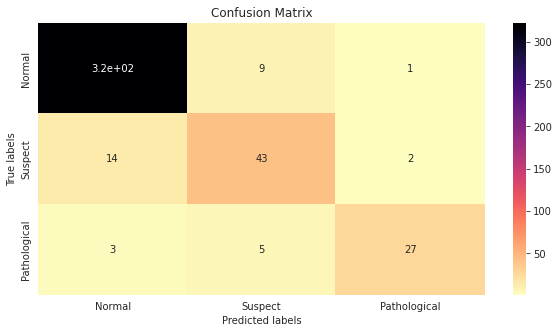

0.7969796333071629


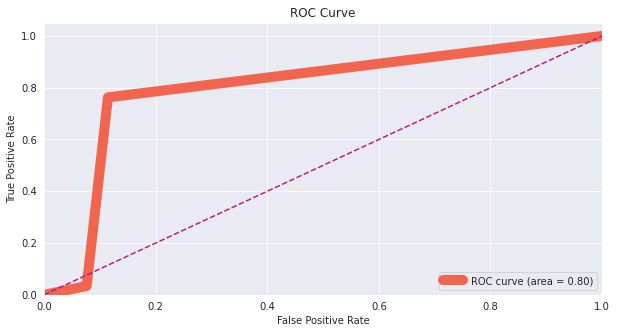

In [ ]:
y_pred_SVM, y_test,acc=svmFunction(X_lda,y_lda)
acc_svm_lda=resultsSummarizer(y_pred_SVM, y_test)

# **Gaussian classifire**

In [ ]:
def Gaussianclassifire(X,y):

  X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=1, stratify=y)

  GNB = GaussianNB()
  GNB.fit(X_train,y_train)
  y_pred_Gauss = GNB.predict(X_test)

  return y_pred_Gauss, y_test

Accuracy Score: 70.4225%
Precision Score: 63.4503%
Recall Score: 73.0988%
F_1 Score: 62.7936%
Sensitvity: 73.0988%


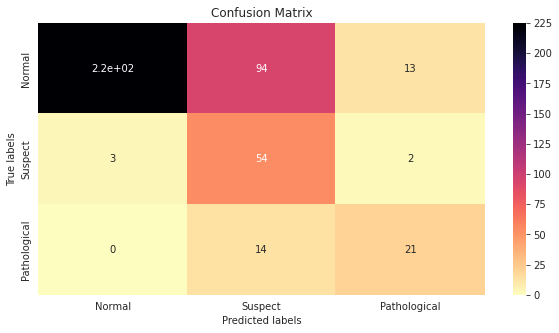

0.743707569389923


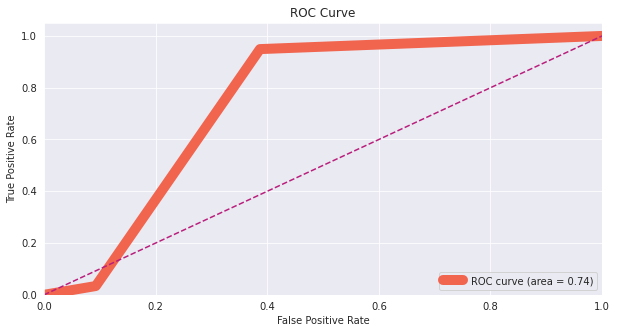

In [ ]:
y_pred_Gauss, y_test= Gaussianclassifire(X,y)
acc_gauss1=resultsSummarizer(y_pred_Gauss,y_test)

Accuracy Score: 81.5217%
Precision Score: 55.8836%
Recall Score: 63.2493%
F_1 Score: 58.2465%
Sensitvity: 63.2493%


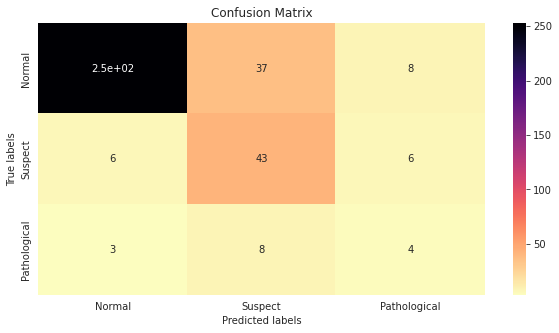

0.8472553006099331


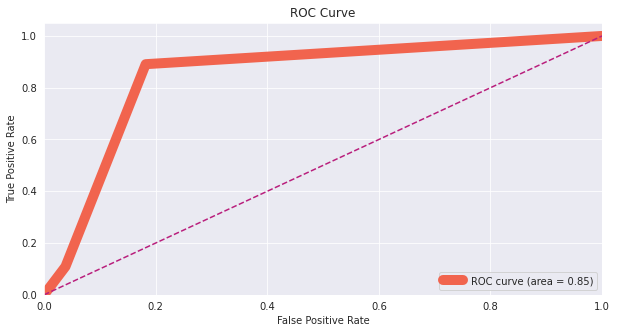

In [ ]:
y_pred_Gauss2, y_test2= Gaussianclassifire(X2,y2)
acc_gauss2=resultsSummarizer(y_pred_Gauss2,y_test2)


In [ ]:
X_lda = LDA(n_components=2).fit_transform(X2,y2)
y_lda=y2

Accuracy Score: 88.8587%
Precision Score: 72.4245%
Recall Score: 73.0012%
F_1 Score: 71.9208%
Sensitvity: 73.0012%


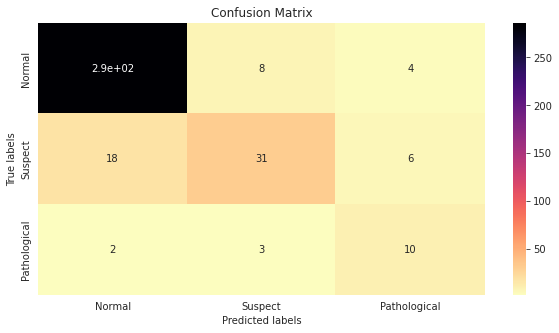

0.7857391809468487


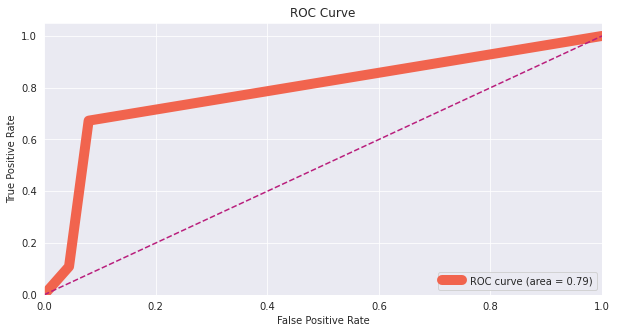

In [ ]:
y_pred_Gauss_lda, y_test_lda= Gaussianclassifire(X_lda,y2)
acc_gauss_lda=resultsSummarizer(y_pred_Gauss_lda,y_test_lda)


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score: 85.8696%
Precision Score: 49.7714%
Recall Score: 46.7134%
F_1 Score: 47.5915%
Sensitvity: 46.7134%


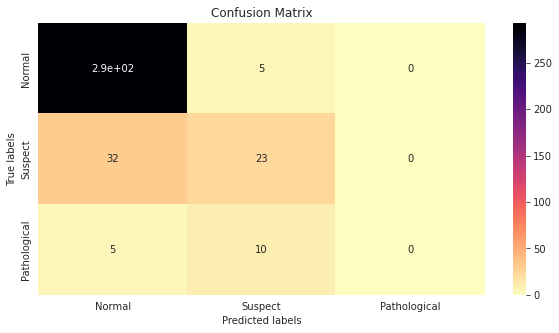

0.685129247749056


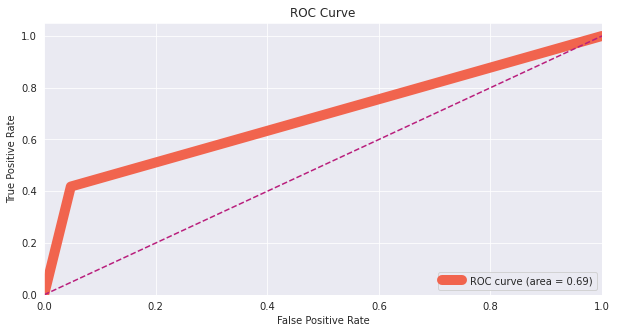

In [ ]:
X_pca = PCA(n_components=2).fit_transform(X2)
y_pca=y2
y_pred_Gauss_pca, y_test_pca= Gaussianclassifire(X_pca,y2)
acc_gauss_pca=resultsSummarizer(y_pred_Gauss_pca,y_test_pca)


In [ ]:
X_pca = PCA(n_components=2).fit_transform(X2)
y_pca=y2
X_lda = LDA(n_components=2).fit_transform(X2,y2)
y_lda=y2

# **K mean Clistering**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


Accuracy Score: 44.9671%
Precision Score: 44.5211%
Recall Score: 56.7771%
F_1 Score: 39.8661%
Sensitvity: 56.7771%


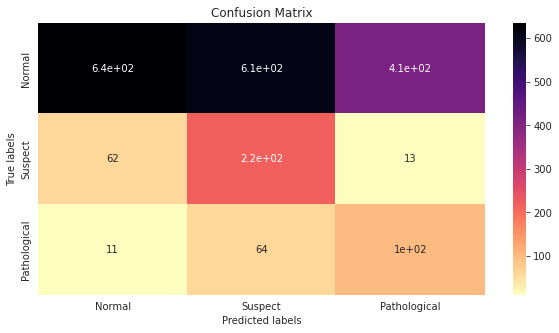

0.729916958041958


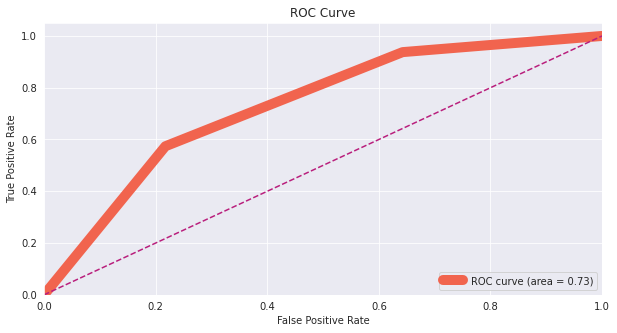

In [ ]:
pca=PCA(n_components=2)
df_clust=pca.fit_transform(X)
scaler = StandardScaler()
df_scal = scaler.fit_transform(df_clust)

Kmean = KMeans(n_clusters=3,n_init=10, max_iter=100)
Kmean.fit(df_clust)

centers=Kmean.cluster_centers_
y_pred_kmean=Kmean.labels_
y_clustering_test=y-1
acc_kmean=resultsSummarizer(y_pred_kmean,y_clustering_test)

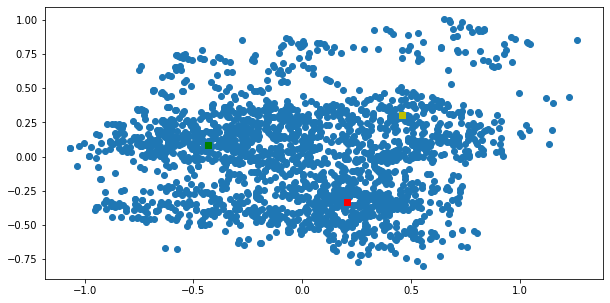

In [ ]:
plt.scatter(df_clust[:,0], df_clust[:,1])
plt.scatter(centers[0,0],centers[0,1], c='r',marker='s')
plt.scatter(centers[1,0],centers[1,1], c='g',marker='s')
plt.scatter(centers[2,0],centers[2,1], c='y',marker='s')

plt.show()

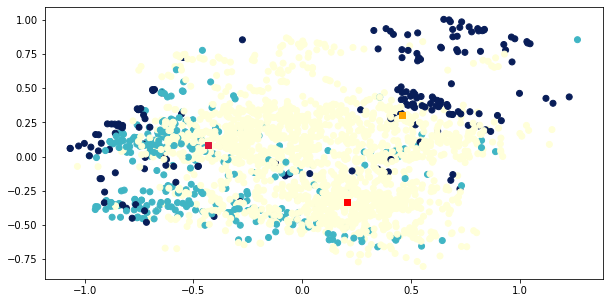

In [ ]:
plt.scatter(df_clust[:,0], df_clust[:,1],c=y,cmap='YlGnBu')
plt.scatter(centers[0,0],centers[0,1], c='r',marker='s')
plt.scatter(centers[1,0],centers[1,1], c='crimson',marker='s')
plt.scatter(centers[2,0],centers[2,1], c='orange',marker='s')

plt.show()

# dealing with unbiased data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=1, stratify=y)
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

1.0    1655
2.0    1382
3.0    1358
Name: fetal_health, dtype: int64


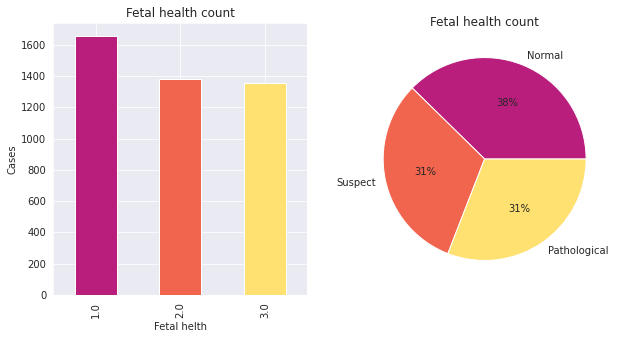

In [ ]:
X_res=pd.concat([X_train_res, X_test], ignore_index=True)
y_train_res=pd.DataFrame(y_train_res)
y_res=pd.concat([y_train_res, y_test], ignore_index=True)

df_res=X_res.copy()
res2=pd.DataFrame(y_res)
df_res.insert(21, "fetal_health", res2)
#total = df_res["fetal_health"].sum()
normal = sum(df_res['fetal_health']==1)
suspect = sum(df_res['fetal_health']==2)
pathological = sum(df_res['fetal_health']==3)

print(df_res["fetal_health"].value_counts())

plt.figure(figsize = (14,8))
plt.subplot(121)
# sns.countplot(x="fetal_health", data=data)
vis_fetal_health = df_res.fetal_health.value_counts().plot(figsize=(10, 5), kind="bar", color = ["#B91E7C", "#F1644E", "#FEE170"])
plt.title("Fetal health count")
plt.xlabel("Fetal helth")
plt.ylabel("Cases")


plt.subplot(122)
# plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], autopct="%1.0f%%")
plt.title("Fetal state")

vis_pie_fetal_health = plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], colors = ["#B91E7C", "#F1644E", "#FEE170"], autopct="%1.0f%%")
plt.title("Fetal health count")


plt.show()

Accuracy Score: 91.3146%
Precision Score: 83.3893%
Recall Score: 88.1544%
F_1 Score: 85.5271%
Sensitvity: 88.1544%


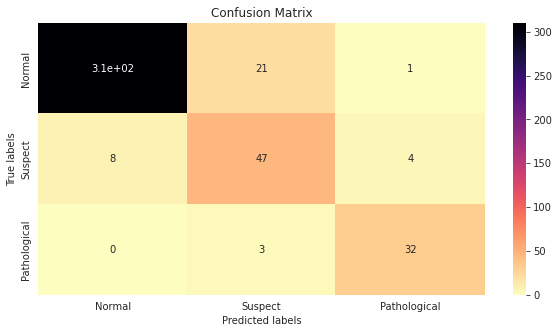

0.8209485983466493


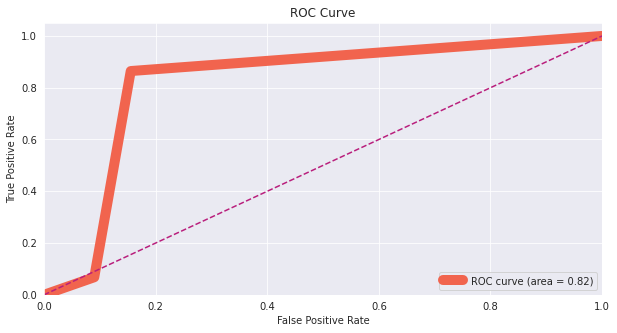

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3,leaf_size=1)

knn_mod = knn.fit(X_train_res,y_train_res)
y_pred_knn = knn_mod.predict(X_test)


acc_knn_res=resultsSummarizer(y_pred_knn,y_test)

Accuracy Score: 85.6808%
Precision Score: 72.9001%
Recall Score: 87.6802%
F_1 Score: 78.0572%
Sensitvity: 87.6802%


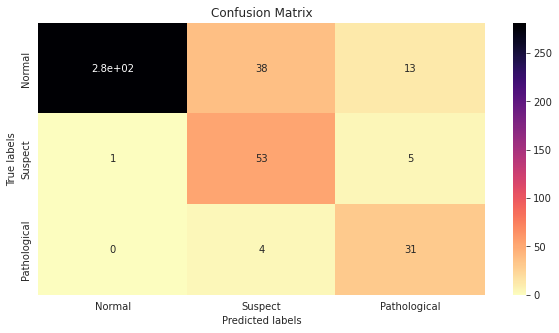

0.8253590726458228


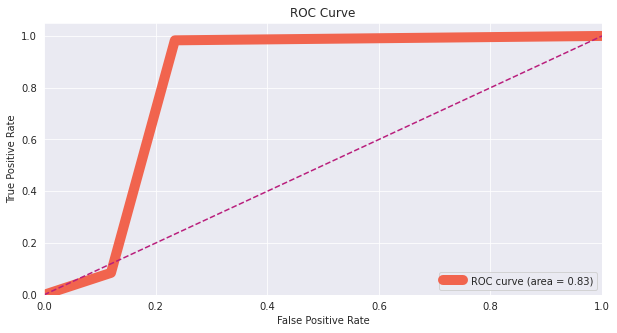

In [ ]:
seed = 172 #defining seed

model_lr = LogisticRegression(max_iter=150, random_state=seed)
model_lr2 = model_lr.fit(X_train_res,y_train_res)
y_pred_lr=model_lr2.predict(X_test)

acc_lr_res=resultsSummarizer(y_pred_lr,y_test)

Accuracy Score: 86.3850%
Precision Score: 77.9847%
Recall Score: 86.6648%
F_1 Score: 80.6258%
Sensitvity: 86.6648%


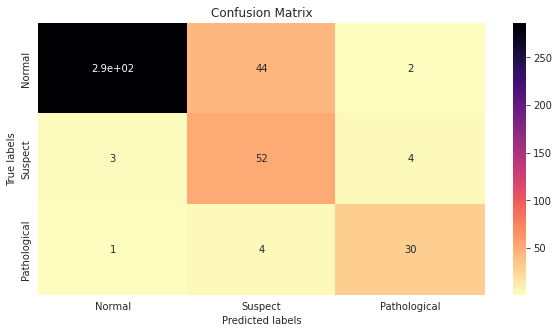

0.8315937745347065


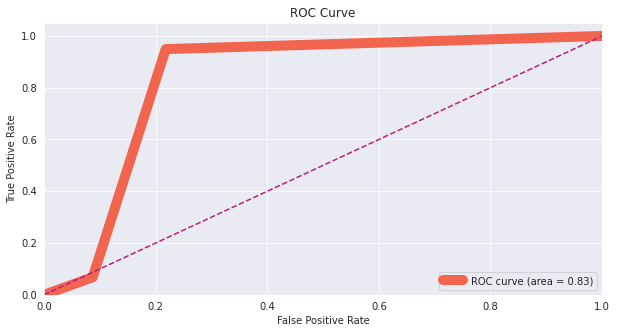

In [ ]:
svc=SVC()
svc.fit(X_train_res,y_train_res)
y_pred_SVM =svc.predict(X_test)

acc_svm_res=resultsSummarizer(y_pred_SVM,y_test)

Accuracy Score: 70.6573%
Precision Score: 63.0656%
Recall Score: 73.1992%
F_1 Score: 62.7396%
Sensitvity: 73.1992%


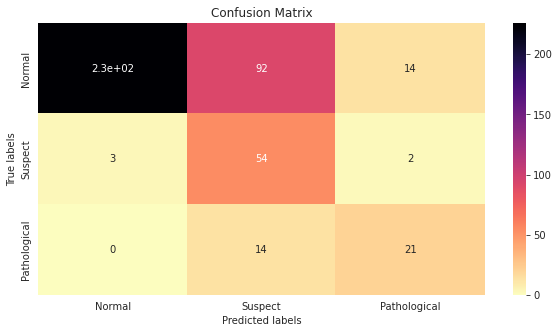

0.7437306608784002


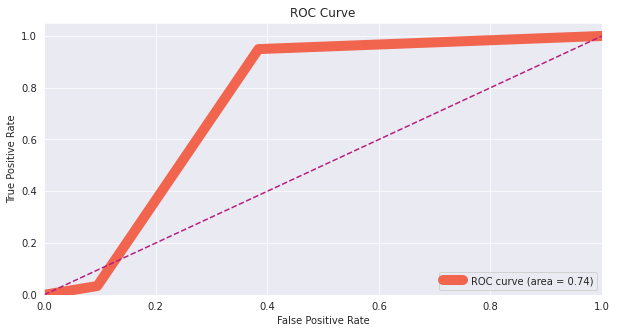

In [ ]:
GNB = GaussianNB()
GNB.fit(X_train_res,y_train_res)
y_pred_Gauss = GNB.predict(X_test)

acc_gauss_res=resultsSummarizer(y_pred_Gauss,y_test)

# **Compering methods**



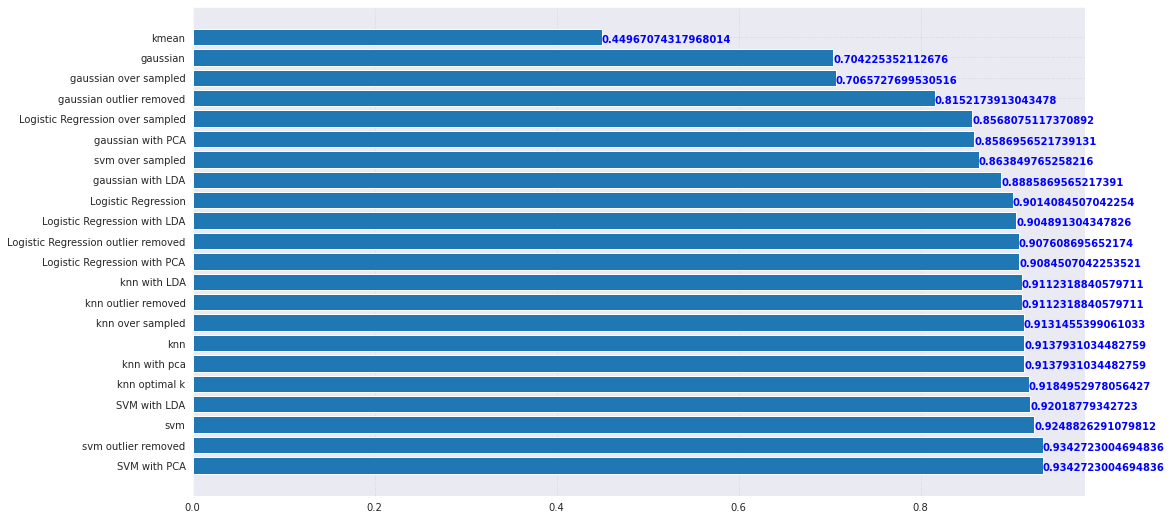

In [ ]:
from seaborn.widgets import color_palette
import matplotlib.pyplot as plt
#data =[[acc_knn1,acc_knn2,acc_knn_res,acc_knn_pca,acc_knn_res2,acc_knn_pca2],[acc_svm1,acc_svm2,acc_svm_res],[acc_gauss1,acc_gauss2,acc_gauss_res][acc_kmean]]
names=['knn' ,'knn outlier removed','knn with pca','knn with LDA','knn over sampled','knn optimal k','Logistic Regression','Logistic Regression outlier removed','Logistic Regression with PCA','Logistic Regression with LDA','Logistic Regression over sampled','svm','svm outlier removed','SVM with PCA','SVM with LDA','svm over sampled','gaussian','gaussian outlier removed','gaussian with PCA','gaussian with LDA','gaussian over sampled','kmean']
accs=[acc_knn1,acc_knn2,acc_knn_pca,acc_knn_lda,acc_knn_res,acc_knn_opt,acc_lr,acc_lr2,acc_lr_pca,acc_lr_lda,acc_lr_res,acc_svm1,acc_svm2,acc_svm_pca,acc_svm_lda,acc_svm_res,acc_gauss1,acc_gauss2,acc_gauss_pca,acc_gauss_lda,acc_gauss_res,acc_kmean]

result = pd.DataFrame(dict(names=['knn' ,'knn outlier removed','knn with pca','knn with LDA','knn over sampled','knn optimal k','Logistic Regression','Logistic Regression outlier removed','Logistic Regression with PCA','Logistic Regression with LDA','Logistic Regression over sampled','svm','svm outlier removed','SVM with PCA','SVM with LDA','svm over sampled','gaussian','gaussian outlier removed','gaussian with PCA','gaussian with LDA','gaussian over sampled','kmean'],
     accs=[acc_knn1,acc_knn2,acc_knn_pca,acc_knn_lda,acc_knn_res,acc_knn_opt,acc_lr,acc_lr2,acc_lr_pca,acc_lr_lda,acc_lr_res,acc_svm1,acc_svm2,acc_svm_pca,acc_svm_lda,acc_svm_res,acc_gauss1,acc_gauss2,acc_gauss_pca,acc_gauss_lda,acc_gauss_res,acc_kmean]))
result_sorted = result.sort_values('accs')
#plt.bar('names', 'marks', data=result_sorted, color='orange')

#plt.show()

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
# Horizontal Bar Plot
ax.barh(result_sorted['names'], result_sorted['accs'],)
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
for i, v in enumerate(result_sorted['accs']):
    ax.text(v , i + .25, str(v),
            color = 'blue', fontweight = 'bold')
# Show top values
ax.invert_yaxis()
# Show Plot
plt.show()
